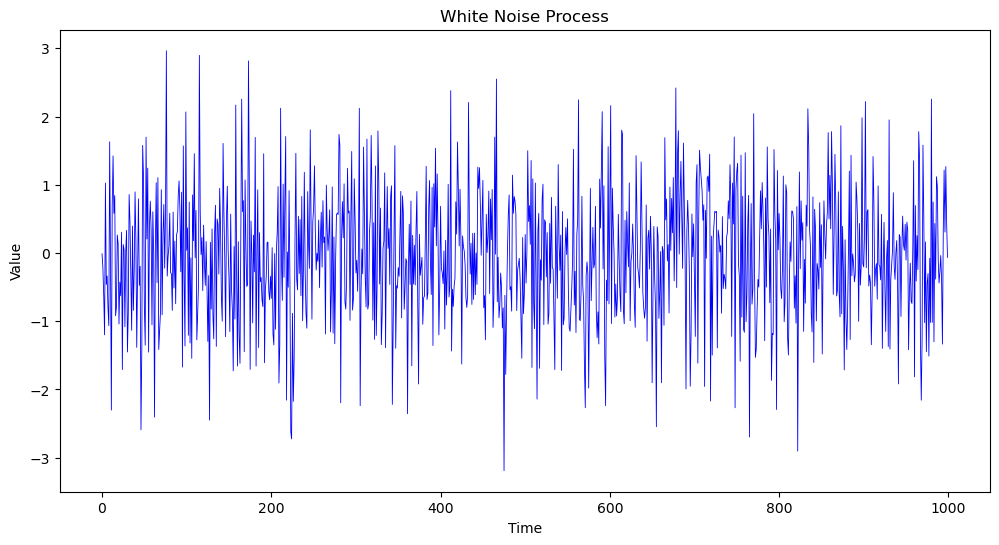

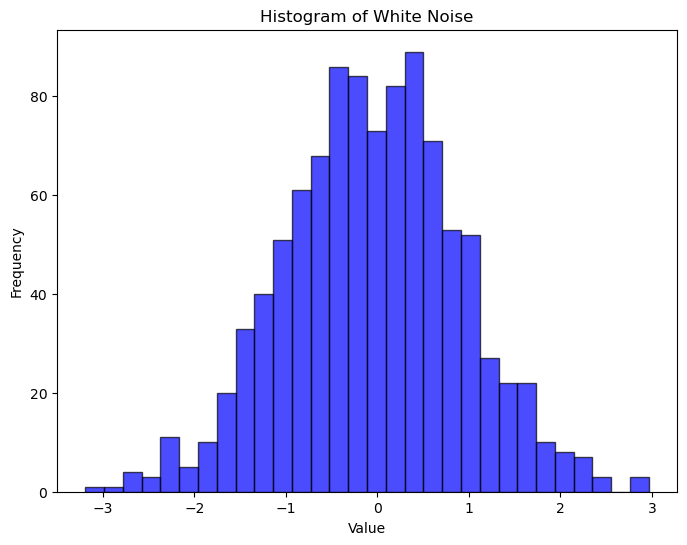

2024-07-30 08:07:47,362 - INFO - Value at Risk (VaR) at 95.0% confidence level: -1.6145789294528297
2024-07-30 08:07:47,378 - INFO - Expected Shortfall (ES) at 95.0% confidence level: -2.0682582545222394
2024-07-30 08:07:47,381 - INFO - Sharpe Ratio: -0.05377227022757105
2024-07-30 08:07:47,383 - INFO - Sortino Ratio: -0.08767896402598245
2024-07-30 08:07:47,384 - INFO - Conditional Value at Risk (CVaR) at 95.0% confidence level: -2.0682582545222394
2024-07-30 08:07:47,385 - INFO - Mean: -0.05157182165490927
2024-07-30 08:07:47,387 - INFO - Variance: 0.9212474276390527


In [3]:
import os
import sys
import numpy as np
import yfinance as yf
import matplotlib.pyplot as plt
import logging
from typing import Optional

# Constants
FIG_SIZE_LARGE = (12, 6)
FIG_SIZE_MEDIUM = (8, 6)
CONFIDENCE_LEVEL = 0.95
RISK_FREE_RATE = 0.01  # Example risk-free rate

# Configure logging
logging.basicConfig(level=logging.INFO, format='%(asctime)s - %(levelname)s - %(message)s')

def generate_white_noise(n: int = 1000, mean: float = 0, std_dev: float = 1) -> np.ndarray:
    """
    Generate a white noise series.

    Args:
        n: Number of data points.
        mean: Mean of the white noise.
        std_dev: Standard deviation of the white noise.

    Returns:
        np.ndarray: Generated white noise series.
    """
    return np.random.normal(mean, std_dev, n)

def plot_series(series: np.ndarray, title: str = 'Time Series', xlabel: str = 'Time', ylabel: str = 'Value', save_path: Optional[str] = None) -> None:
    """
    Plot a time series.

    Args:
        series: Time series data.
        title: Title of the plot.
        xlabel: X-axis label.
        ylabel: Y-axis label.
        save_path: Path to save the plot. If None, the plot is displayed.
    """
    plt.figure(figsize=FIG_SIZE_LARGE)
    plt.plot(series, color='blue', linewidth=0.6)
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    if save_path:
        plt.savefig(save_path)
    plt.show()

def plot_histogram(series: np.ndarray, bins: int = 30, title: str = 'Histogram', xlabel: str = 'Value', ylabel: str = 'Frequency', save_path: Optional[str] = None) -> None:
    """
    Plot a histogram of a series.

    Args:
        series: Data series.
        bins: Number of bins for the histogram.
        title: Title of the plot.
        xlabel: X-axis label.
        ylabel: Y-axis label.
        save_path: Path to save the plot. If None, the plot is displayed.
    """
    plt.figure(figsize=FIG_SIZE_MEDIUM)
    plt.hist(series, bins=bins, color='blue', edgecolor='black', alpha=0.7)
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    if save_path:
        plt.savefig(save_path)
    plt.show()

def calculate_var(series: np.ndarray, confidence_level: float = CONFIDENCE_LEVEL) -> float:
    """
    Calculate Value at Risk (VaR) for a given confidence level.

    Args:
        series: Time series data.
        confidence_level: Confidence level for VaR.

    Returns:
        float: Calculated VaR.
    """
    percentile = 100 * (1 - confidence_level)
    var = np.percentile(series, percentile)
    return var

def calculate_es(series: np.ndarray, confidence_level: float = CONFIDENCE_LEVEL) -> float:
    """
    Calculate Expected Shortfall (ES) for a given confidence level.

    Args:
        series: Time series data.
        confidence_level: Confidence level for ES.

    Returns:
        float: Calculated ES.
    """
    var = calculate_var(series, confidence_level)
    es = series[series <= var].mean()
    return es

def calculate_sharpe_ratio(series: np.ndarray, risk_free_rate: float = RISK_FREE_RATE) -> float:
    """
    Calculate the Sharpe ratio.

    Args:
        series: Time series data.
        risk_free_rate: Risk-free rate.

    Returns:
        float: Calculated Sharpe ratio.
    """
    excess_returns = series - risk_free_rate / 252
    return np.mean(excess_returns) / np.std(excess_returns)

def calculate_sortino_ratio(series: np.ndarray, risk_free_rate: float = RISK_FREE_RATE) -> float:
    """
    Calculate the Sortino ratio.

    Args:
        series: Time series data.
        risk_free_rate: Risk-free rate.

    Returns:
        float: Calculated Sortino ratio.
    """
    excess_returns = series - risk_free_rate / 252
    downside_deviation = np.std(excess_returns[excess_returns < 0])
    return np.mean(excess_returns) / downside_deviation

def calculate_conditional_var(series: np.ndarray, confidence_level: float = CONFIDENCE_LEVEL) -> float:
    """
    Calculate Conditional Value at Risk (CVaR) for a given confidence level.

    Args:
        series: Time series data.
        confidence_level: Confidence level for CVaR.

    Returns:
        float: Calculated CVaR.
    """
    var = calculate_var(series, confidence_level)
    conditional_var = np.mean(series[series <= var])
    return conditional_var

def fetch_market_data(ticker: str, start_date: str, end_date: str) -> np.ndarray:
    """
    Fetch historical market data for a given ticker.

    Args:
        ticker: Stock ticker symbol.
        start_date: Start date for fetching data.
        end_date: End date for fetching data.

    Returns:
        np.ndarray: Array of daily returns.
    """
    data = yf.download(ticker, start=start_date, end=end_date)
    returns = data['Adj Close'].pct_change().dropna().values
    return returns

def analyze_market_data(ticker: str, start_date: str, end_date: str, confidence_level: float = CONFIDENCE_LEVEL, output_dir: Optional[str] = None) -> None:
    """
    Analyze market data for risk measures.

    Args:
        ticker: Stock ticker symbol for market data analysis.
        start_date: Start date for market data analysis.
        end_date: End date for market data analysis.
        confidence_level: Confidence level for VaR and ES.
        output_dir: Directory to save output files.
    """
    try:
        returns = fetch_market_data(ticker, start_date, end_date)

        if output_dir and not os.path.exists(output_dir):
            os.makedirs(output_dir)

        plot_series(returns, title=f'{ticker} Daily Returns', save_path=f"{output_dir}/{ticker}_returns.png" if output_dir else None)
        plot_histogram(returns, title=f'Histogram of {ticker} Returns', save_path=f"{output_dir}/{ticker}_histogram.png" if output_dir else None)
        
        var = calculate_var(returns, confidence_level)
        es = calculate_es(returns, confidence_level)
        sharpe_ratio = calculate_sharpe_ratio(returns)
        sortino_ratio = calculate_sortino_ratio(returns)
        conditional_var = calculate_conditional_var(returns, confidence_level)

        logging.info(f'Value at Risk (VaR) for {ticker} at {confidence_level*100}% confidence level: {var}')
        logging.info(f'Expected Shortfall (ES) for {ticker} at {confidence_level*100}% confidence level: {es}')
        logging.info(f'Sharpe Ratio for {ticker}: {sharpe_ratio}')
        logging.info(f'Sortino Ratio for {ticker}: {sortino_ratio}')
        logging.info(f'Conditional Value at Risk (CVaR) for {ticker} at {confidence_level*100}% confidence level: {conditional_var}')
        
        calculated_mean = np.mean(returns)
        calculated_variance = np.var(returns)
        logging.info(f'Mean of {ticker} Returns: {calculated_mean}')
        logging.info(f'Variance of {ticker} Returns: {calculated_variance}')
        
    except ValueError as ve:
        logging.error(f"ValueError: {ve}")
    except TypeError as te:
        logging.error(f"TypeError: {te}")
    except Exception as e:
        logging.error(f"An error occurred: {e}")

def backtest_strategy(ticker: str, start_date: str, end_date: str, confidence_level: float = CONFIDENCE_LEVEL, output_dir: Optional[str] = None) -> None:
    """
    Backtest a simple moving average strategy and analyze risk measures.

    Args:
        ticker: Stock ticker symbol for market data analysis.
        start_date: Start date for market data analysis.
        end_date: End date for market data analysis.
        confidence_level: Confidence level for VaR and ES.
        output_dir: Directory to save output files.
    """
    try:
        data = yf.download(ticker, start=start_date, end=end_date)
        data['Returns'] = data['Adj Close'].pct_change()
        data['SMA50'] = data['Adj Close'].rolling(window=50).mean()
        data['SMA200'] = data['Adj Close'].rolling(window=200).mean()
        data['Signal'] = 0
        data['Signal'][50:] = np.where(data['SMA50'][50:] > data['SMA200'][50:], 1, -1)
        data['Strategy Returns'] = data['Signal'].shift(1) * data['Returns']
        
        if output_dir and not os.path.exists(output_dir):
            os.makedirs(output_dir)

        plot_series(data['Strategy Returns'].dropna().values, title=f'{ticker} Strategy Returns', save_path=f"{output_dir}/{ticker}_strategy_returns.png" if output_dir else None)
        plot_histogram(data['Strategy Returns'].dropna().values, title=f'Histogram of {ticker} Strategy Returns', save_path=f"{output_dir}/{ticker}_strategy_histogram.png" if output_dir else None)
        
        var = calculate_var(data['Strategy Returns'].dropna().values, confidence_level)
        es = calculate_es(data['Strategy Returns'].dropna().values, confidence_level)
        sharpe_ratio = calculate_sharpe_ratio(data['Strategy Returns'].dropna().values)
        sortino_ratio = calculate_sortino_ratio(data['Strategy Returns'].dropna().values)
        conditional_var = calculate_conditional_var(data['Strategy Returns'].dropna().values, confidence_level)

        logging.info(f'Value at Risk (VaR) for {ticker} strategy at {confidence_level*100}% confidence level: {var}')
        logging.info(f'Expected Shortfall (ES) for {ticker} strategy at {confidence_level*100}% confidence level: {es}')
        logging.info(f'Sharpe Ratio for {ticker} strategy: {sharpe_ratio}')
        logging.info(f'Sortino Ratio for {ticker} strategy: {sortino_ratio}')
        logging.info(f'Conditional Value at Risk (CVaR) for {ticker} strategy at {confidence_level*100}% confidence level: {conditional_var}')
        
    except ValueError as ve:
        logging.error(f"ValueError: {ve}")
    except TypeError as te:
        logging.error(f"TypeError: {te}")
    except Exception as e:
        logging.error(f"An error occurred: {e}")

def analyze_white_noise(n: int, mean: float, std_dev: float, confidence_level: float, output_dir: Optional[str]) -> None:
    """
    Analyze white noise for risk management.

    Args:
        n: Number of data points.
        mean: Mean of white noise.
        std_dev: Standard deviation of white noise.
        confidence_level: Confidence level for VaR and ES.
        output_dir: Directory to save output files.
    """
    try:
        white_noise = generate_white_noise(n, mean, std_dev)
        
        if output_dir and not os.path.exists(output_dir):
            os.makedirs(output_dir)

        plot_series(white_noise, title='White Noise Process', save_path=f"{output_dir}/white_noise.png" if output_dir else None)
        plot_histogram(white_noise, title='Histogram of White Noise', save_path=f"{output_dir}/histogram.png" if output_dir else None)
        
        var = calculate_var(white_noise, confidence_level)
        es = calculate_es(white_noise, confidence_level)
        sharpe_ratio = calculate_sharpe_ratio(white_noise)
        sortino_ratio = calculate_sortino_ratio(white_noise)
        conditional_var = calculate_conditional_var(white_noise, confidence_level)
        
        logging.info(f'Value at Risk (VaR) at {confidence_level*100}% confidence level: {var}')
        logging.info(f'Expected Shortfall (ES) at {confidence_level*100}% confidence level: {es}')
        logging.info(f'Sharpe Ratio: {sharpe_ratio}')
        logging.info(f'Sortino Ratio: {sortino_ratio}')
        logging.info(f'Conditional Value at Risk (CVaR) at {confidence_level*100}% confidence level: {conditional_var}')
        
        calculated_mean = np.mean(white_noise)
        calculated_variance = np.var(white_noise)
        logging.info(f'Mean: {calculated_mean}')
        logging.info(f'Variance: {calculated_variance}')
        
    except ValueError as ve:
        logging.error(f"ValueError: {ve}")
    except TypeError as te:
        logging.error(f"TypeError: {te}")
    except Exception as e:
        logging.error(f"An error occurred: {e}")

def main(n: int = 1000, mean: float = 0, std_dev: float = 1, confidence_level: float = CONFIDENCE_LEVEL, output_dir: Optional[str] = None, ticker: Optional[str] = None, start_date: Optional[str] = None, end_date: Optional[str] = None, backtest: bool = False) -> None:
    """
    Main function to analyze white noise, market data, and backtest strategies.

    Args:
        n: Number of data points.
        mean: Mean of white noise.
        std_dev: Standard deviation of white noise.
        confidence_level: Confidence level for VaR and ES.
        output_dir: Directory to save output files.
        ticker: Stock ticker symbol for market data analysis.
        start_date: Start date for market data analysis.
        end_date: End date for market data analysis.
        backtest: Run backtest for a simple strategy.
    """
    if backtest and ticker and start_date and end_date:
        backtest_strategy(ticker, start_date, end_date, confidence_level, output_dir)
    elif ticker and start_date and end_date:
        analyze_market_data(ticker, start_date, end_date, confidence_level, output_dir)
    else:
        analyze_white_noise(n, mean, std_dev, confidence_level, output_dir)

if __name__ == "__main__":
    if 'ipykernel' in sys.modules:
        main()
    else:
        import argparse
        parser = argparse.ArgumentParser(description="Analyze white noise and market data for risk management and backtesting.")
        parser.add_argument("--n", type=int, default=1000, help="Number of data points")
        parser.add_argument("--mean", type=float, default=0, help="Mean of white noise")
        parser.add_argument("--std_dev", type=float, default=1, help="Standard deviation of white noise")
        parser.add_argument("--confidence_level", type=float, default=CONFIDENCE_LEVEL, help="Confidence level for VaR and ES")
        parser.add_argument("--output_dir", type=str, help="Directory to save output files")
        parser.add_argument("--ticker", type=str, help="Stock ticker symbol for market data analysis")
        parser.add_argument("--start_date", type=str, help="Start date for market data analysis")
        parser.add_argument("--end_date", type=str, help="End date for market data analysis")
        parser.add_argument("--backtest", action='store_true', help="Run backtest for a simple strategy")
        args = parser.parse_args()
        
        main(args.n, args.mean, args.std_dev, args.confidence_level, args.output_dir, args.ticker, args.start_date, args.end_date, args.backtest)